In [1]:
#2D Array format: [[N],[BodyLength],[LegLength],[tau_a], [F_a], [leg angle], [rPos], [xPos], [zPos]]

In [2]:
import numpy as np
import csv
from numpy import load
import sympy as sym

import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
# load array
filenamefilename = "output/filenames.csv"
with open(filenamefilename) as fp:
    reader = csv.reader(fp, delimiter="\n", quotechar='"')
    for row in reader:
        fn = row[0]
# filenames = load(filenamefilename)
# filenames = filenames.strsplit('\n')
# filename = filenames[len(filenames)-1]

#fn = 'output/data20200921_220916at35.npy'      # specify timestamp of desired file and uncomment to not run the most recent data file
data = load(fn)
# print the array
# print(data)
print(fn)
print("step     N        lbod      l1    l2      tau_h   tau_k  theta_l1 theta_l2  dz  dtl1   dtl2   z ")
for i in range(len(data[0])):
    print(i, sep ='\t', end ='\t')
    for j in range(len(data)):
        if j == 5 or j == 6:
            print('{:8.3f}'.format(data[j][i]*180/3.141592654), sep ='\t', end ='')
        else:
            print('{:8.4f}'.format(data[j][i]), sep ='\t', end ='')
    print()

output/data20200923_085059.npy
step     N        lbod      l1    l2      tau_h   tau_k  theta_l1 theta_l2  dz  dtl1   dtl2   z 
0	 30.0000  0.0800  0.1200  0.2300  0.0747  -8.777  59.798  2.0963  0.1000  5.8040 -5.7721  0.4199  0.3000  1.5000  0.5000  0.0800  0.1200  0.2300  0.4200
1	 30.0000  0.0800  0.1200  0.2300 -0.1516   6.099  60.911  2.0772 -0.0675  5.5739 -5.6216  0.4202  0.3000  1.5000  0.5000  0.0800  0.1200  0.2300  0.4200
2	 30.0000  0.0800  0.1200  0.2300 -0.0468   2.998  79.580  1.7366 -0.8360  3.6606 -3.7740  0.3961  0.3000  1.5000  0.5000  0.0800  0.1200  0.2300  0.4200
3	 30.0000  0.0800  0.1200  0.2300 -0.0471   4.105  87.601  1.5804 -0.4545  2.4235 -1.2643  0.3570  0.3000  1.5000  0.5000  0.0800  0.1200  0.2300  0.4200
4	 30.0000  0.0800  0.1200  0.2300 -0.0849   7.345  95.994  1.5023 -0.0685  1.7654 -0.9164  0.3539  0.3000  1.5000  0.5000  0.0800  0.1200  0.2300  0.4200
5	 30.0000  0.0800  0.1200  0.2300 -0.1822  13.358 102.694  1.4393  0.0169  3.6398 -1.8551  0.345

30.0


Text(0.5, 0, 'title')

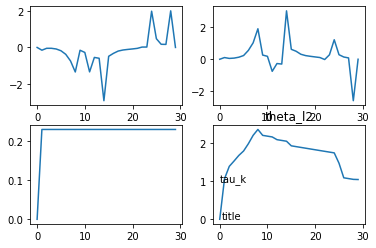

In [3]:
N = int(data[0][0])
print(data[0][0]) #m.coln, m.sgn,
tau_k_values = np.zeros(N)
tau_h_values = np.zeros(N)
thetal1_values = np.zeros(N)
thetal2_values = np.zeros(N)

for i in range (1,N):
    tau_k_values[i] = data[4][i]
    tau_h_values[i] =data[3][i]
    thetal1_values[i] =data[5][i]
    thetal2_values[i] =data[6][i]

    
f, axs = plt.subplots(2,2) #create axes



axs[0][0].plot(tau_k_values)
plt.text(0, 1, 'tau_k')


plt.title("Torque_knee")

axs[1][0].plot(tau_h_values)
plt.title("Torque_hip")

axs[0][1].plot(thetal1_values)
plt.title("theta_l1")

axs[1][1].plot(thetal2_values)
plt.title("theta_l2")
plt.text(0.5, 0, 'title')
# axs[1][1].title("Torque and theta")

# axs[0][0].title("thetal1")
# axs[1][0].title("thetal1")

# axs[0][1].title("thetal1")
# axs[1][1].title("thetal2")


# plt.title("Torque and theta")

# torque for upper leg can be exerted, since the body is attached to the 2 vertical rails (even when body removed from model)


In [4]:
lenBod = data[1][0]
lenLeg1 = data[2][0]
lenLeg2 = data[3][0]
theta1 = data[6][:]
theta2 = data[7][:]

# xPlot = data[7][:]
zPlot = data[11][:]
zStart = data[18][0]
print("zStart = ", zStart)

zStart =  0.42


[0.41994683 0.42023755 0.39611992 0.35695176 0.35391027 0.34508011
 0.33407757 0.3114142  0.29272443 0.31076553 0.31320745 0.31553933
 0.32262606 0.32436464 0.32597065 0.33776922 0.34202558 0.34628652
 0.35050661 0.35465956 0.35873126 0.36271186 0.36659426 0.3703696
 0.37403859 0.41008369 0.42279697 0.42216918 0.42140565 0.41994682]


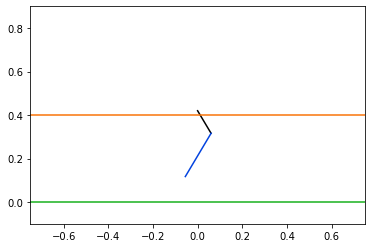

In [5]:

fig1, ax1 = plt.subplots(1,1) #create axes
#ax1.set_aspect('equal')
print(zPlot)
def plot_robot(i,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-0.75,0.75])    # choose scales according to 2:3 aspect ratio
    ax.set_ylim([-0.1,0.9])

    
#     thA = theta[i]
#     leg1_xt = 0 #xPlot[i]
#     leg1_yt = zPlot[i]
#     leg1_xb = lenBod*np.cos(thA) + 0 # xPlot[i]
#     leg1_yb = zPlot[i] - lenBod*np.sin(thA)
#     ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color='xkcd:black')
    
#     #plot leg 2
#     Lt = 0.5*lenBod+ zPlot[i] - 0.5*lenLeg
#     Lb = 0.5*lenBod + zPlot[i] + 0.5*lenLeg
#     leg2_xt = Lt*np.cos(thA) + 0 #xPlot[i]
#     leg2_yt = zPlot[i] - Lt*np.sin(thA)
#     leg2_xb = Lb*np.cos(thA) + 0 #xPlot[i]
#     leg2_yb = zPlot[i] - Lb*np.sin(thA)
   
#     ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color='xkcd:black')
    
    
     #plot leg 
    leg_xt = 0 
    leg_yt = zPlot[i] 
    leg_xb = 0 + lenLeg1*np.cos(theta1[i])
    leg_yb = zPlot[i] - lenLeg1*np.sin(theta1[i])
    ax.plot([leg_xt,leg_xb],[leg_yt,leg_yb],color='xkcd:black')
    
#     leg_xt = m.q0[i,'x'].value 
#     leg_yt = m.q0[i,'z'].value 
#     leg_xb = m.q0[i,'x'].value + m.l1.value*cos(m.q0[i,'theta_l1'].value)
#     leg_yb = m.q0[i,'z'].value - m.l1.value*sin(m.q0[i,'theta_l1'].value)
#     ax.plot([leg_xt,leg_xb],[leg_yt,leg_yb],color='xkcd:black')
    
    

    #plot leg2 
    leg2_xt = 0 + lenLeg1*np.cos(theta1[i])
    leg2_yt = zPlot[i] - lenLeg1*np.sin(theta1[i])
    leg2_xb = 0 + lenLeg1*np.cos(theta1[i]) + lenLeg2*np.cos(theta2[i])
    leg2_yb = zPlot[i] - lenLeg1*np.sin(theta1[i]) - lenLeg2*np.sin(theta2[i])
    ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color='xkcd:blue')

    
    #plot ground
    ax.plot([-1.5,1.5],[0,0],color='xkcd:green')

    #plot starting height
    ax.plot([-1.5,1.5],[0.4,0.4],color='xkcd:orange')

    
update = lambda i: plot_robot(i,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(0,N),interval = 50 ,repeat=True)

HTML(animate.to_jshtml())